# CA House Pricing Project

## Data extraction 

#### Context

This is the dataset used in the second chapter of Aurélien Géron's recent book 'Hands-On Machine learning with Scikit-Learn and TensorFlow'. 

The data contains information from the 1990 California census. 

The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data.

***

#### Content

Longitude - A measure of how far west a house is; a higher value is farther west

Latitude - A measure of how far north a house is; a higher value is farther north

HousingMedianAge - Median age of a house within a block; a lower number is a newer building

TotalRooms - Total number of rooms within a block

TotalBedrooms - Total number of bedrooms within a block

Population - Total number of people residing within a block

Households - Total number of households, a group of people residing within a home unit, for a block

MedianIncome - Median income for households within a block of houses (measured in tens of thousands of US Dollars)

MedianHouseValue - Median house value for households within a block (measured in US Dollars)

OceanProximity - Location of the house w.r.t ocean/sea

***

** Import some libraries we ususly use when we are analyzing the dataset. **

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

***

#### Loading data

In [3]:
price = pd.read_csv("housing.csv")

In [397]:
print(f'There are {price.shape[0]:d} datapoints with {price.shape[1]} dimensions.')

There are 20640 datapoints with 10 dimensions.


In [398]:
price.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Data cleanup

#### Treating missing values

In [399]:
price.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

The feature **total_bedrooms** has 207 missing values

In [4]:
price['total_bedrooms'].fillna(price['total_bedrooms'].mean(), inplace=True)

#### Treating/Detecting Outliers

In [5]:
price.groupby(["ocean_proximity"]).count()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,,,
<1H OCEAN,9136,9136,9136,9136,9136,9136,9136,9136,9136
INLAND,6551,6551,6551,6551,6551,6551,6551,6551,6551
ISLAND,5,5,5,5,5,5,5,5,5
NEAR BAY,2290,2290,2290,2290,2290,2290,2290,2290,2290
NEAR OCEAN,2658,2658,2658,2658,2658,2658,2658,2658,2658


ISLAND only has 5 rows, it would be good to remove it from the dataset/

In [6]:
price.drop(price[price["ocean_proximity"] == "ISLAND"].index.tolist(), inplace=True)

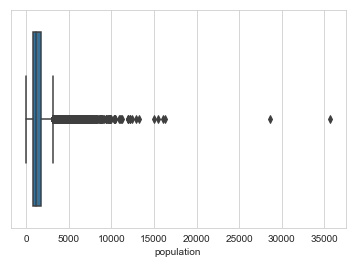

In [7]:
sns.boxplot(x="population", data = price)

In [8]:
population_Q1 = np.percentile(price["population"], 25)
population_Q3 = np.percentile(price["population"], 75)
population_IQR = population_Q3 - population_Q1
print("population")
print("Q1: "+ str(population_Q1))
print("Q3: "+ str(population_Q3))
print("IQR: "+ str(population_IQR))

population
Q1: 787.0
Q3: 1725.0
IQR: 938.0


In [9]:
outliers_value = population_Q3 + 1.5 * population_IQR
outliers = price[price["population"] > outliers_value].index.tolist()

In [10]:
price.drop(outliers, inplace= True)

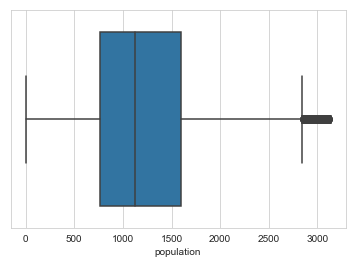

In [11]:
sns.boxplot(x="population", data = price)

#### Create 3 more columns with the total bedrooms and rooms per population in the same block.

In [12]:
price['average_rooms'] = price['total_rooms'] / price['population']
price['average_bedrooms'] = price['total_bedrooms'] / price['population']
price['pop_household'] = price['population'] / price['households']

#### Dropping the 2 columns we are not going to use

In [13]:
price.drop('total_rooms', axis=1, inplace=True)
price.drop('total_bedrooms', axis=1, inplace=True)

In [14]:
price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19439 entries, 0 to 20639
Data columns (total 11 columns):
longitude             19439 non-null float64
latitude              19439 non-null float64
housing_median_age    19439 non-null float64
population            19439 non-null float64
households            19439 non-null float64
median_income         19439 non-null float64
median_house_value    19439 non-null float64
ocean_proximity       19439 non-null object
average_rooms         19439 non-null float64
average_bedrooms      19439 non-null float64
pop_household         19439 non-null float64
dtypes: float64(10), object(1)
memory usage: 1.8+ MB


**Dummy variables**

In [15]:
ocean_proximity = pd.get_dummies(price["ocean_proximity"], drop_first=True)

In [16]:
price_machine_learning = pd.concat([price, ocean_proximity], axis=1)

In [17]:
price_machine_learning.head()

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,ocean_proximity,average_rooms,average_bedrooms,pop_household,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,322.0,126.0,8.3252,452600.0,NEAR BAY,2.732919,0.400621,2.555556,0,1,0
1,-122.22,37.86,21.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,2.956685,0.460641,2.109842,0,1,0
2,-122.24,37.85,52.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2.957661,0.383065,2.802260,0,1,0
3,-122.25,37.85,52.0,558.0,219.0,5.6431,341300.0,NEAR BAY,2.283154,0.421147,2.547945,0,1,0
4,-122.25,37.85,52.0,565.0,259.0,3.8462,342200.0,NEAR BAY,2.879646,0.495575,2.181467,0,1,0


#### Remove unrelevant columns

In [18]:
price_machine_learning.drop(["longitude","latitude","ocean_proximity"], axis=1, inplace= True)

## EDA

#### Testing correlation

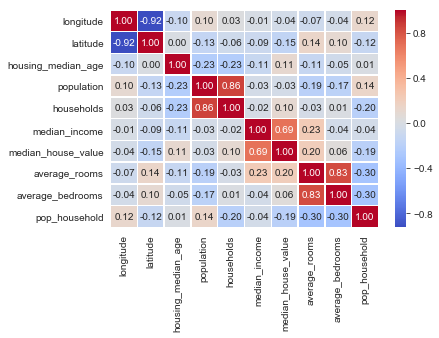

In [19]:
sns.heatmap(price.corr(), annot= True, cmap='coolwarm', linewidths=.5, fmt= '.2f')

There is a high correlation between households and population

#### Remove high correlation column

In [20]:
price_machine_learning.drop('households', axis=1, inplace=True)

#### New correlations with a heatmap

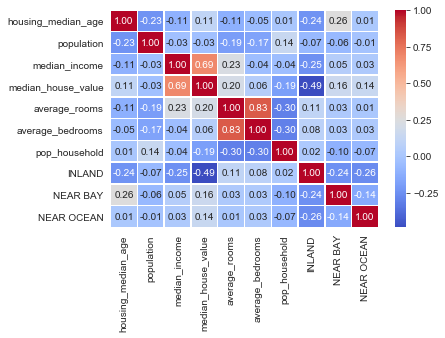

In [22]:
sns.heatmap(price_machine_learning.corr(), annot= True, cmap='coolwarm', linewidths=.5, fmt= '.2f')

In [376]:
import matplotlib.image as mpimg
from geopy.distance import vincenty

# The geographic graph is retrived online

city_lat_long = pd.read_csv('cal_cities_lat_long.csv')
city_pop_data = pd.read_csv('cal_populations_city.csv')
county_pop_data = pd.read_csv('cal_populations_county.csv')
housing = pd.read_csv('housing.csv')

In [377]:
city_coords = {}

for dat in city_lat_long.iterrows():
    row = dat[1]
    if row['Name'] not in city_pop_data['City'].values:   
        continue           
    else: 
        city_coords[row['Name']] = (float(row['Latitude']), float(row['Longitude']))

In [307]:
city_pop_dict = {}
for dat in city_pop_data.iterrows():
    row = dat[1]
    city_pop_dict[row['City']] =  row['pop_april_1990']


big_cities = {}

for key, value in city_coords.items():
    if city_pop_dict[key] > 500000:
        big_cities[key] = value

In [308]:
def closest_point(location, location_dict):
    """ take a tuple of latitude and longitude and 
        compare to a dictonary of locations where
        key = location name and value = (lat, long)
        returns tuple of (closest_location , distance) """
    closest_location = None
    for city in location_dict.keys():
        distance = vincenty(location, location_dict[city]).kilometers
        if closest_location is None:
            closest_location = (city, distance)
        elif distance < closest_location[1]:
            closest_location = (city, distance)
    return closest_location

In [309]:
housing['close_city'] = housing.apply(lambda x: closest_point((x['latitude'],x['longitude']),city_coords), axis = 1)
housing['close_city_name'] = [x[0] for x in housing['close_city'].values]
housing['close_city_dist'] = [x[1] for x in housing['close_city'].values]
housing['close_city_pop'] = [city_pop_dict[x] for x in housing['close_city_name'].values]

housing = housing.drop('close_city', axis=1)
housing.head()


#add the data relating to the points to the closest big city
housing['big_city'] = housing.apply(lambda x: closest_point((x['latitude'],x['longitude']),big_cities), axis = 1)
housing['big_city_name'] = [x[0] for x in housing['big_city'].values]
housing['big_city_dist'] = [x[1] for x in housing['big_city'].values]

housing = housing.drop('big_city', axis=1)

/Users/jason639782/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  


In [311]:
california_img = mpimg.imread('california.png')

housing_plot = housing[['longitude','population','latitude', 'close_city_name','big_city_name','big_city_dist','median_house_value']]

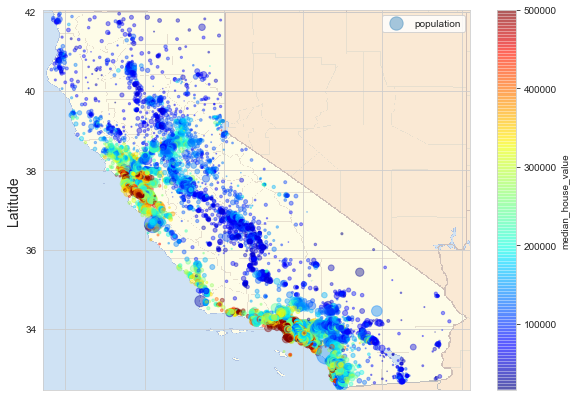

In [312]:
housing_plot.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
                  s=housing_plot['population']/100, label='population', figsize=(10,7),
                  c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)


plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend() 
plt.show()

Notice in the above plot:

The figure shows where homes are the most expensive in CA in 1990 census. More expensive houses are in the bay area and closed to the ocean in LA.

No handles with labels found to put in legend.


Text(0.5,1,'Frequemcy of the location of the houses')

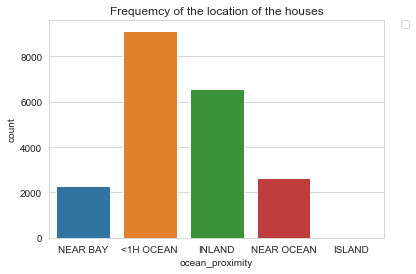

In [380]:
sns.countplot(x='ocean_proximity', data=price)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Frequency of the location of the houses')

Notice in the above plot:
    
More CA districts are 1 hour away from the ocean in 1990, less CA districts are near bay.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a19b63240>,
      dtype=object)

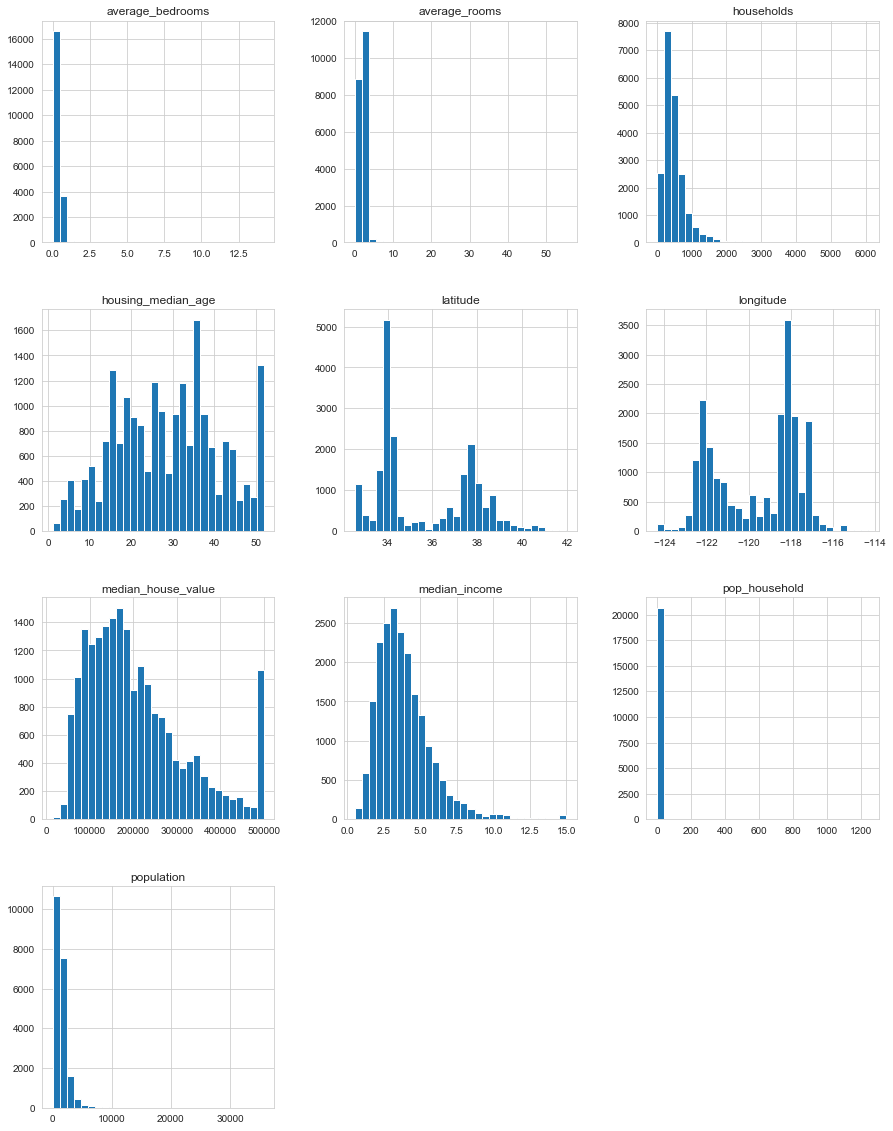

In [381]:
price.hist(bins=30, figsize=(15,20))

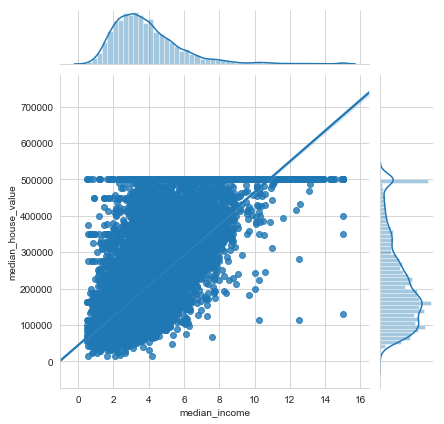

In [546]:
sns.jointplot(x="median_income" ,y="median_house_value" ,data=price, kind= "reg")

Notice in the above plot:

It looks like a little odd becasue the max median house value is 500000. Besides that, when median income is higher, the median house value goes higher. I would said its a positive correlation.

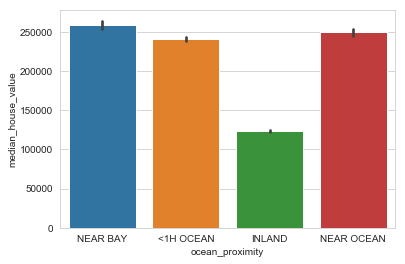

In [550]:
sns.barplot(x= "ocean_proximity", y="median_house_value", data=price)

Notice in the above plot:

Median_house_value is higher when the disticts are near bay and near ocean. 

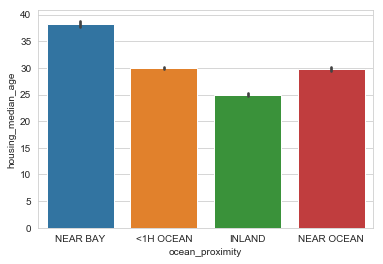

In [552]:
sns.barplot(x="ocean_proximity", y="housing_median_age", data=price)

Notice in the above plot:

Housing_median_age is higher when houses are near bay. However, houses are more expensive as well. It actually makes sense even now.

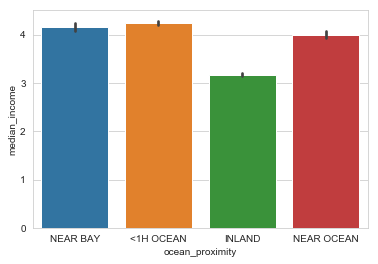

In [554]:
sns.barplot(x="ocean_proximity", y="median_income", data=price)

Notice in the above plot:
    
Median_income is higher when districts are near bay and near ocean. It matches that the median house vaues are also higher in those area. When people have higher income, they can afford to buy the higher value houses.

In [539]:
price.head()

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,ocean_proximity,average_rooms,average_bedrooms,pop_household
0,-122.23,37.88,41.0,322.0,126.0,8.3252,452600.0,NEAR BAY,2.732919,0.400621,2.555556
1,-122.22,37.86,21.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,2.956685,0.460641,2.109842
2,-122.24,37.85,52.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2.957661,0.383065,2.802260
3,-122.25,37.85,52.0,558.0,219.0,5.6431,341300.0,NEAR BAY,2.283154,0.421147,2.547945
4,-122.25,37.85,52.0,565.0,259.0,3.8462,342200.0,NEAR BAY,2.879646,0.495575,2.181467


In [553]:
price.groupby("ocean_proximity").mean()

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,average_rooms,average_bedrooms,pop_household
ocean_proximity,,,,,,,,,,
<1H OCEAN,-118.859002,34.568742,29.942774,1307.969456,450.071504,4.243710,241013.225863,1.821028,0.373954,3.036818
INLAND,-119.775164,36.787915,25.005864,1163.597654,406.717869,3.171309,123617.612315,2.181580,0.442289,2.956069
NEAR BAY,-122.261919,37.800412,38.319602,1110.616569,447.831145,4.155636,259359.569941,2.087128,0.432555,2.606783
NEAR OCEAN,-119.345499,34.751791,29.794580,1206.734093,459.916339,3.998259,249378.203064,2.030182,0.427792,2.720113


## Machine learning (Three models)

In [418]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [515]:
X = price_machine_learning.drop(["median_house_value","population"], axis=1)
y = price_machine_learning["median_house_value"]

In [516]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Predictive analytics - Linear regression

In [517]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Intercept and Coefficient

In [518]:
print(lm.intercept_)

80207.12607989922


In [519]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
housing_median_age,1054.812200
median_income,38011.815533
average_rooms,3616.283425
average_bedrooms,13716.059814
pop_household,-14095.640533
INLAND,-76325.457902
NEAR BAY,3423.835517
NEAR OCEAN,9439.956505


In [520]:
predictions = lm.predict(X_test)

#### Linear regression assumptions

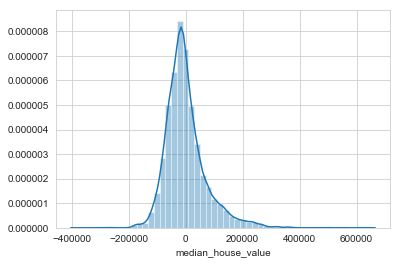

In [521]:
sns.distplot((y_test-predictions), bins=50)

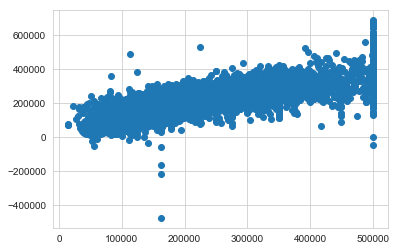

In [522]:
plt.scatter(y_test, predictions)

In [523]:
from sklearn import metrics

In [524]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 51446.44875042871
MSE: 5106686151.651401
RMSE: 71461.08137756803


In [525]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(y_test, predictions)
print("R2: {}".format(coefficient_of_dermination.round(3)))

R2: 0.625


The R2 looks not really well wehn we use linear regression. 

## Predictive analytics - DecisionTreeRegressor

In [526]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

max_depths = np.arange(1, X.shape[1] + 1)

param_grid = {'max_depth': max_depths,
              'max_features': max_depths}

grid = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=3, scoring="r2")
grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8]), 'max_features': array([1, 2, 3, 4, 5, 6, 7, 8])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [527]:
print("The best values for paramaters:", grid.best_params_)
print("The R2:", round(grid.best_score_,2))

The best values for paramaters: {'max_depth': 6, 'max_features': 8}
The R2: 0.67


In [528]:
dt = DecisionTreeRegressor(max_depth = 6, max_features = 8)
dt.fit(X_train, y_train)
Dt_pred_test = dt.predict(X_test)

print("The R2:", round(r2_score(y_test, Dt_pred_test),2))

The R2: 0.68


In [529]:
print('MAE:', metrics.mean_absolute_error(y_test, Dt_pred_test))
print('MSE:', metrics.mean_squared_error(y_test, Dt_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Dt_pred_test)))

MAE: 46663.93523354951
MSE: 4401881333.571715
RMSE: 66346.6753769299


It looks like so far **DecisionTreeRegressor** is better than linear regression based on the R2, MSE and RMSE 

## Predictive analytics - RandomForestRegressor

In [555]:
from sklearn.ensemble import RandomForestRegressor

param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}]

forest_reg = RandomForestRegressor()

# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring="r2")

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [556]:
print("The best values for paramaters:", grid_search.best_params_)
print("The R2:", round(grid_search.best_score_,2))

The best values for paramaters: {'max_features': 4, 'n_estimators': 30}
The R2: 0.73


In [557]:
rf = RandomForestRegressor(n_estimators = 30, max_features = 4)
rf.fit(X_train, y_train)
rf_pred_test = rf.predict(X_test)

print("The R2:", round(r2_score(y_test, rf_pred_test),2))

The R2: 0.72


**RandomForestRegressor** has higher R2 than **DecisionTreeRegressor**. I would use **RandomForestRegressor** model to make perdiction for this dataset.